In [224]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
from sklearn import datasets

In [225]:
iris = datasets.load_iris()
iris.target_names
X = iris.data
y = iris.target
# K clusters
k = 3

In [226]:
# PCA
def myPCA(X:np.ndarray, n_dimensions:int):
  # N, d = X.shape
  # Centering
  X_centered = X - X.mean(axis=0) 

  # Covariance Matrix of d*d
  Sigma = np.dot(X_centered.T, X_centered)

  # SVD
  U, Lambda, V = np.linalg.svd(Sigma)

  X_centered_PC = np.dot(U[:,:n_dimensions].T, X_centered.T).T
  X_PC = X_centered_PC + X.mean(axis=0)[:n_dimensions]

  # Purposely rescale and add negative sign to mimic Sklearn's PCA
  return -(X_PC - X_PC.mean(axis=0))/X_PC.std(axis=0) 

In [227]:
def myKMeans (X: np.ndarray, k: int, iterations=100, tol=0.001):
  N, d = X.shape
  mu = X[np.random.choice(range(N), size=k)]
  c = np.zeros(N)

  for step in tqdm(range(iterations)):
    prev_mu = mu.copy()

    for i in range(N):
      c[i] = np.argmin(np.linalg.norm(X[i] - mu, axis=1)**2)
    for j in range(k):
      mu[j] = np.mean(X[np.arange(N)[c==j]], axis=0)

    # print(mu)

    if (np.sum(np.linalg.norm(prev_mu - mu,axis=1)) < 0.001):
      # print(np.sum(np.linalg.norm(prev_mu - mu,axis=1)))
      break
  distortion = np.sum([np.sum(np.linalg.norm(X[np.arange(N)[c==i]] - mu[i], axis=1)**2) for i in range(k)])
  print(f"distortion: {distortion}")

  return c, mu, distortion

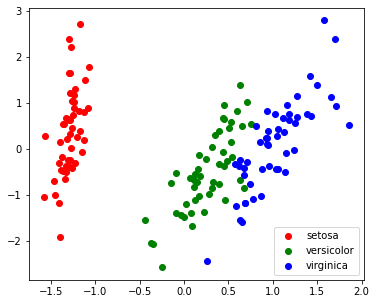

In [228]:
# Ground Truth Label
X_PC2 = myPCA(X, 2)
target_ids = range(len(iris.target_names))


plt.figure(figsize=(6,5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
  plt.scatter(X_PC2[y==i, 0], X_PC2[y==i, 1], c=c, label=label)
plt.legend()
plt.show()

distortion: 78.85566582597731



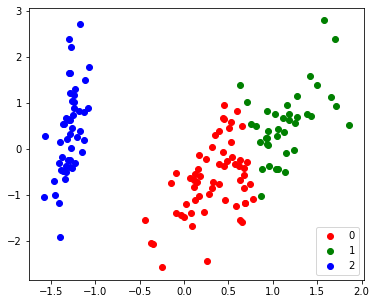

In [245]:
# K-means with 3 clusters
cluster, centroids, distortion = myKMeans(X, 3)
plt.figure(figsize=(6,5))
for i, c, label in zip(range(3), 'rgbcmykw', range(3)):
  plt.scatter(X_PC2[cluster==i, 0], X_PC2[cluster==i, 1], c=c, label=label)
plt.legend()
plt.show()

distortion: 57.25600931571816



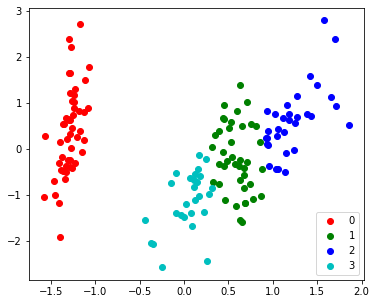

In [244]:
cluster, centroids, distortion = myKMeans(X, 4)
plt.figure(figsize=(6,5))
for i, c, label in zip(range(4), 'rgbcmykw', range(4)):
  plt.scatter(X_PC2[cluster==i, 0], X_PC2[cluster==i, 1], c=c, label=label)
plt.legend()
plt.show()

distortion: 46.44618205128205



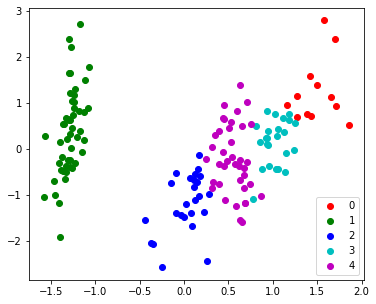

In [242]:
cluster, centroids, distortion = myKMeans(X, 5)
plt.figure(figsize=(6,5))
for i, c, label in zip(range(5), 'rgbcmykw', range(5)):
  plt.scatter(X_PC2[cluster==i, 0], X_PC2[cluster==i, 1], c=c, label=label)
plt.legend()
plt.show()

# Note that K-means is susceptible to local minima
# Select the result with minimal distortion.


In [249]:
%cd /content/drive/My Drive/CS229/Notes7a-KMeans

/content/drive/My Drive/CS229/Notes7a-KMeans


In [250]:
!jupyter nbconvert --to markdown KMeans.ipynb

[NbConvertApp] Converting notebook KMeans.ipynb to markdown
[NbConvertApp] Support files will be in KMeans_files/
[NbConvertApp] Making directory KMeans_files
[NbConvertApp] Making directory KMeans_files
[NbConvertApp] Making directory KMeans_files
[NbConvertApp] Making directory KMeans_files
[NbConvertApp] Writing 3110 bytes to KMeans.md
